# Introduction

The Boston Airbnb dataset contains information about thousands of short-term rental properties available in the city of Boston. This rich dataset provides a valuable resource for understanding the city's real estate market and the preferences of travelers to the area. In this analysis, we will explore the characteristics of the listings in the dataset, investigate the factors that influence Airbnb pricing in Boston, and provide insights for property owners and potential guests.

# Business Questions
1. How prices for all Boston’s Airbnb fluctuate throughout the Sep'16 - Sep'17? What are the peak times for Airbnb rate in Boston during the time?
2. How neighborhoods in Boston can influence the listing price? In case we want to make a listing on Airbnb in Boston, can we predict our yearly income with neighborhoods?
3. How different features influence the night price of listing?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

import pandas as pd

# Read the "calendar.csv" file from the "Kaggle" directory
calendar = pd.read_csv('Kaggle/calendar.csv')

# Read the "listing.csv" file from the "Kaggle" directory
listings = pd.read_csv('Kaggle/listings.csv')

# Read the "review.csv" file from the "Kaggle" directory
reviews = pd.read_csv('Kaggle/reviews.csv')

# 1. Data Exploration

In [2]:
# Display the shape of the dataFrame
print("Shape of the calendar DataFrame: {}".format(calendar.shape))
print("Shape of the listings DataFrame: {}".format(listings.shape))
print("Shape of the reviews DataFrame: {}".format(reviews.shape))

Shape of the calendar DataFrame: (1308890, 4)
Shape of the listings DataFrame: (3585, 95)
Shape of the reviews DataFrame: (68275, 6)


In the following part I would like to explore thre dataset separately.

## 1.1 Calendar Dataset

In [3]:
# Randomly display the 10 rows of the calendar dataframe
print("First 5 rows of the calendar DataFrame:")
calendar.sample(10)

First 5 rows of the calendar DataFrame:


listing_id        date available    price
552762     13912467  2017-03-11         t  $354.00
152527     12074204  2016-10-18         f      NaN
1054795     7693354  2016-10-30         t   $75.00
251725     10836881  2017-07-02         t   $80.00
42517       9485607  2017-02-27         t  $195.00
172489     13081347  2017-09-04         f      NaN
1218770    14253149  2017-08-01         t   $79.00
1026301     9352045  2016-11-23         f      NaN
1240616    12233830  2016-09-24         f      NaN
812784     14221294  2016-11-15         f      NaN

Seems price would have null value if available is f.

In [4]:
# Check the earliest and latest date of the dataframe
print('calendar: first date = ' , calendar.date.min(), ' , last date = ', calendar.date.max())

calendar: first date =  2016-09-06  , last date =  2017-09-05


In [5]:
# Check number of null value in each column
calendar.isnull().sum().sort_values(ascending=False)

price         665853
listing_id         0
date               0
available          0
dtype: int64

In [6]:
# Basic info about each columns
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


Some datatype are not suitable. We will correct them later

In [7]:
# Summary of each column
calendar.describe()

listing_id
count  1.308890e+06
mean   8.442118e+06
std    4.500149e+06
min    3.353000e+03
25%    4.679319e+06
50%    8.578710e+06
75%    1.279603e+07
max    1.493346e+07

## Data Quality Issues of Calendar dataset:

1. Price is null value if available is f
2. Datatype are not correct for some columns

## 1.2 Listing Dataset

In [8]:
# Randomly display the 10 rows of the listings dataFrame
listings.sample(10)

id                            listing_url       scrape_id  \
2219  14418593  https://www.airbnb.com/rooms/14418593  20160906204935   
3451   6823017   https://www.airbnb.com/rooms/6823017  20160906204935   
2592  14780153  https://www.airbnb.com/rooms/14780153  20160906204935   
505   10537553  https://www.airbnb.com/rooms/10537553  20160906204935   
1943   3673104   https://www.airbnb.com/rooms/3673104  20160906204935   
1711   8613870   https://www.airbnb.com/rooms/8613870  20160906204935   
3353  13801598  https://www.airbnb.com/rooms/13801598  20160906204935   
1608  14083611  https://www.airbnb.com/rooms/14083611  20160906204935   
225    9676551   https://www.airbnb.com/rooms/9676551  20160906204935   
1964   8428052   https://www.airbnb.com/rooms/8428052  20160906204935   

     last_scraped                                              name  \
2219   2016-09-07                             Ultimate Convenience!   
3451   2016-09-07  Allston, Close to Harvard Business School + BU A   
2592   2016-09-07                       Cosy, Clean, Great location   
505    2016-09-07      bright room in 4b1b near T/longwood, 1b/room   
1943   2016-09-07                  Bright Apartment Near Everything   
1711   2016-09-07                  Cozy private room in Charlestown   
3353   2016-09-07         Perfectly Located 2BR apt, 1 private room   
1608   2016-09-07                         E5 Post-Flight relaxation   
225    2016-09-07                  Urban oasis, wonderful location!   
1964   2016-09-07                    Beacon Hill, 1 private bedroom   

                                                summary  \
2219  My place is close to Fenway Park, Hynes Conven...   
3451  My place is close to Harvard Business School, ...   
2592  These quite specious and clean, very well loca...   
505   room in 4bedroom 1bath unit, share kitchen, ba...   
1943  Stay comfortably in the center of old Boston, ...   
1711  Comfy private room in 2br apt with living room...   
3353  My place is close to Boston University  Fenway...   
1608  My place is close to Maverick Marketplace Cafe...   
225   Sweet dreams and beautiful morning light in th...   
1964  Newly renovated 2 bedroom apartment in Beacon ...   

                                                  space  \
2219                                                NaN   
3451  My location is close to a lot of attraction li...   
2592  This is a great place for you if you'd like to...   
505                                                 NaN   
1943  Original mahogany floors, persian rugs, vintag...   
1711  This is a great private room in a quiet, clean...   
3353                                                NaN   
1608                                                NaN   
225                                                 NaN   
1964  Beacon Hill is a quaint and historic neighborh...   

                                            description experiences_offered  \
2219  My place is close to Fenway Park, Hynes Conven...                none   
3451  My place is close to Harvard Business School, ...                none   
2592  These quite specious and clean, very well loca...                none   
505   room in 4bedroom 1bath unit, share kitchen, ba...                none   
1943  Stay comfortably in the center of old Boston, ...                none   
1711  Comfy private room in 2br apt with living room...                none   
3353  My place is close to Boston University  Fenway...                none   
1608  My place is close to Maverick Marketplace Cafe...                none   
225   Sweet dreams and beautiful morning light in th...                none   
1964  Newly renovated 2 bedroom apartment in Beacon ...                none   

                                  neighborhood_overview  ...  \
2219                                                NaN  ...   
3451  Very safe and it's very close to Charle's Rive...  ...   
2592                                                NaN  ...   


In [9]:
# Loop over each column and check if it contains commas

for column in listings.columns:
    if listings[column].dtype == 'object':  # check if the column contains string data
        if listings[column].str.contains(',').any():  # check if the column contains commas
            print(column)

name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
host_name
host_location
host_about
host_verifications
street
city
smart_location
amenities
price
weekly_price
monthly_price
security_deposit


In [10]:
# Pick some columns from the list above which I'm interested in
listings[['space', 'neighborhood_overview', 'transit', 'access', 'interaction', 'host_location', 'city', 'smart_location', 'amenities', 'price']].sample(n=10)

space  \
2588  My roommate and I share a huge two bedroom apa...   
2035  With outstanding views of the Zakim Bridge and...   
1269                                                NaN   
3170                                                NaN   
1497  Newly renovated 1 bedroom in an unbelievable l...   
3078  Our luxury high-rise apt. is conveniently loca...   
2337                             B(PHONE NUMBER HIDDEN)   
1065  The apartment features 2 bedrooms (one master ...   
2539  Quiet and sunny unit with common roof deck, wa...   
1377  This beautiful corner unit has high ceilings a...   

                                  neighborhood_overview  \
2588  Cleveland Circle is a beautiful and safe neigh...   
2035  Directions:  Keep right at the fork to continu...   
1269                                                NaN   
3170                                                NaN   
1497                                                NaN   
3078                                                NaN   
2337  Residents will find themselves right in the he...   
1065  The South End has become one of the most popul...   
2539  walking distance to public transportation, all...   
1377  Our apartment is located in the beautiful, his...   

                                                transit  \
2588  The B, C, and D trains and restaurants are all...   
2035                                                NaN   
1269                                                NaN   
3170                                                NaN   
1497                                                NaN   
3078  When Boston Harbor meets lavish living the res...   
2337  These newly constructed, luxury apartments epi...   
1065  Just by walking, the visitors will be able to ...   
2539             Green line is steps from the apartment   
1377  We're a 5-minute walk from the Green Line (Cop...   

                                                 access  \
2588  You are welcome to enjoy the kitchen, living r...   
2035                                                NaN   
1269                                                NaN   
3170                                                NaN   
1497                                                NaN   
3078                                                NaN   
2337                                                NaN   
1065  The guest will be able to access all parts of ...   
2539       common roof deck on flight up from apartment   
1377  We'll be away during this time, so you'll have...   

                                            interaction  \
2588                                                NaN   
2035                                                NaN   
1269                                                NaN   
3170                                                NaN   
1497                                                NaN   
3078                                                NaN   
2337                                                NaN   
1065                                                NaN   
2539                  I am reachable by phone and email   
1377  We're happy to answer questions by phone or text.   

                             host_location    city smart_location  \
2588  Boston, Massachusetts, United States  Boston     Boston, MA   
2035                                    US  Boston     Boston, MA   
1269  Boston, Massachusetts, United States  Boston     Boston, MA   
3170  Boston, Massachusetts, United States  Boston     Boston, MA   
1497  Boston, Massachusetts, United States  Boston     Boston, MA   
3078                                    US  Boston     Boston, MA   
2337                                    US  Boston     Boston, MA   
1065  Boston, Massachusetts, United States  Boston     Boston, MA   
2539  Boston, Massachusetts, United States  Boston     Boston, MA   
1377  Boston, Massachusetts, United States  Boston     Boston, MA   

                                        

In [11]:
# Columns name and info
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

Some columns are all null value.

In [12]:
# Checking the nulls for columns
listings.isnull().sum().sort_values(ascending=False)

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

In [13]:
# Columns with 0 missing values.
listings_no_nan = set(listings.columns[listings.isnull().mean()==0]) 
print(listings_no_nan)

{'requires_license', 'bed_type', 'calculated_host_listings_count', 'host_name', 'experiences_offered', 'host_identity_verified', 'latitude', 'cancellation_policy', 'calendar_updated', 'is_location_exact', 'host_total_listings_count', 'last_scraped', 'id', 'longitude', 'accommodates', 'name', 'number_of_reviews', 'state', 'maximum_nights', 'host_since', 'price', 'scrape_id', 'host_picture_url', 'availability_90', 'host_has_profile_pic', 'amenities', 'picture_url', 'country', 'host_verifications', 'room_type', 'require_guest_phone_verification', 'host_thumbnail_url', 'availability_30', 'availability_60', 'listing_url', 'host_id', 'extra_people', 'minimum_nights', 'host_listings_count', 'host_url', 'calendar_last_scraped', 'description', 'country_code', 'instant_bookable', 'neighbourhood_cleansed', 'host_is_superhost', 'require_guest_profile_picture', 'guests_included', 'street', 'smart_location', 'availability_365'}


In [14]:
# Columns with more than 75% of the values missing
listings_75_nan = set(listings.columns[listings.isnull().mean()> 0.75]) 
print(listings_75_nan)

{'weekly_price', 'jurisdiction_names', 'license', 'has_availability', 'neighbourhood_group_cleansed', 'monthly_price', 'square_feet'}


In [15]:
# Number of unique values for each feature
listings.nunique().sort_values(ascending=False)

id                              3585
listing_url                     3585
longitude                       3585
latitude                        3585
picture_url                     3585
                                ... 
country                            1
has_availability                   0
license                            0
jurisdiction_names                 0
neighbourhood_group_cleansed       0
Length: 95, dtype: int64

Luckily no listing id is duplicated.

In [16]:
# Stats summary for listing dataframe
listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.585000e+03  3.585000e+03  3.585000e+03          3585.000000   
mean   8.440875e+06  2.016091e+13  2.492311e+07            58.902371   
std    4.500787e+06  8.516813e-01  2.292781e+07           171.119663   
min    3.353000e+03  2.016091e+13  4.240000e+03             0.000000   
25%    4.679319e+06  2.016091e+13  6.103425e+06             1.000000   
50%    8.577620e+06  2.016091e+13  1.928100e+07             2.000000   
75%    1.278953e+07  2.016091e+13  3.622147e+07             7.000000   
max    1.493346e+07  2.016091e+13  9.385411e+07           749.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                3585.000000                           0.0  3585.000000   
mean                   58.902371                           NaN    42.340032   
std                   171.119663                           NaN     0.024403   
min                     0.000000                           NaN    42.235942   
25%                     1.000000                           NaN    42.329995   
50%                     2.000000                           NaN    42.345201   
75%                     7.000000                           NaN    42.354685   
max                   749.000000                           NaN    42.389982   

         longitude  accommodates    bathrooms  ...  review_scores_accuracy  \
count  3585.000000   3585.000000  3571.000000  ...             2762.000000   
mean    -71.084818      3.041283     1.221647  ...                9.431571   
std       0.031565      1.778929     0.501487  ...                0.931863   
min     -71.171789      1.000000     0.000000  ...                2.000000   
25%     -71.105083      2.000000     1.000000  ...                9.000000   
50%     -71.078429      2.000000     1.000000  ...               10.000000   
75%     -71.062155      4.000000     1.000000  ...               10.000000   
max     -71.000100     16.000000     6.000000  ...               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2767.000000            2765.000000   
mean                    9.258041               9.646293   
std                     1.168977               0.762753   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  2767.000000             2763.000000   
mean                      9.646549                9.414043   
std                       0.735507                0.903436   
min                       4.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  license  jurisdiction_names  \
count          2764.000000      0.0                 0.0   
mean              9.168234      NaN                 NaN   
std               1.011116      NaN                 NaN   
min               2.000000      NaN                 NaN   
25%               9.000000      NaN                 NaN   
50%               9.000000      NaN                 NaN   
75%              10.000000      NaN                 NaN   
max              10.000000      NaN                 NaN   

       calculated_host_listings_count  reviews_per_month  
count                     3585.000000        2829.000000  
mean                        12.733891           1.970908  
std                         29.415076           2.120561  
min                          1.000000           0.010000  
25%                          1.0000

## Data Quality Issues of Listing dataset:
1. Completely 0 non-null value for some columns
2. Incorrect datatype for some columns
3. Some columns such as amenities contain servaral values in one cell, separated with commas

## 1.3 Review Dataset

In [17]:
# Randomly display the 20 rows of the reviews dataFrame
reviews.sample(n=20)

listing_id        id        date  reviewer_id  reviewer_name  \
64607    10850420  69019334  2016-04-08     29448937           Mark   
40124    11757166  67396589  2016-03-29      1304994           Abhi   
65990     1175376  60069906  2016-01-18     53878571          Murad   
18806     2167993  33646374  2015-05-31      5427837         Savita   
34676     2247190  18451310  2014-08-26     19219521          Rehan   
43104     1141522  36761553  2015-07-01     24384436        Bronwyn   
22009     5267396  43848242  2015-08-22     41113162         Anneke   
2294      4924009  44004379  2015-08-23     14806354          César   
66037      705900  64826266  2016-03-08     57084140           Mari   
32579      766700  49207256  2015-10-02     35517139            Tim   
38836    11767622  86168160  2016-07-15     81996848  Tandemdigital   
51362    11772497  90929808  2016-08-03     41324440           Jack   
11505      205894  20718856  2014-10-04     21753117           Sian   
23667     3166256  75172100  2016-05-19     64058345          Laura   
17849     3012529  44906687  2015-08-30     34364147        Susanna   
62610     8460627  51781529  2015-10-24     45773519       Kristina   
32924     9663423  71483703  2016-04-25     50545280       Jeanette   
48967     6337106  49865338  2015-10-06     20637458          Irina   
63661      629814  95919369  2016-08-21     32489953          Helen   
51874      526970  50702869  2015-10-13      1916976           José   

                                                comments  
64607  Adriana was an excellent host and available be...  
40124  The host canceled this reservation 7 days befo...  
65990  Very clean and cozy place. All the comfort you...  
18806  Nitzen was a great host, always available and ...  
34676  Fantastic location and a very nice apartment. ...  
43104  The accommodation was well located, a close wa...  
22009  The apartment was clean and the perfect accomm...  
2294                 Place was very practical and clean.  
66037  It was one of the best Airbnb experiences I've...  
32579  Great neighborhood and great description of pl...  
38836  It was clean, Jonathan was responsive, the are...  
51362  Great place, clean and perfect location for ba...  
11505  Clean, tidy and warm. All I needed for a coupl...  
23667  Veronika a été une merveilleuse hôte. Elle a é...  
17849  Sally and Bruce are very nice hosts. We had ju...  
62610  Amaan was a fabulous host!!!! He went above an...  
32924  Chris was available to give a tour/key handove...  
48967  Tom was very hospitable and made our stay much...  
63661  It was a amazing trip to live in both DH2 and ...  
51874  Had a great time staying with Robert and Jacky...

In [18]:
# Display info for reviews dataframe
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


Those id shouldn't be int, so basically there is no int columns in this dataframe. No need to show stats summary.

In [19]:
# Check earliest and latest date for reviews
print('reviews: first review date = ' , reviews.date.min(), ' , last review date = ', reviews.date.max())

reviews: first review date =  2009-03-21  , last review date =  2016-09-06


## Data Quality Issues of Review dataset:
1. Still, some columns have wrong datatype
2. There are some missing value in comments, but not a big issue

# 2. Data Cleansing

From the first try of data exploration we find that there are some data quality issues among the three dataset. In the following part we will do some data cleaning to solve the issues so we can continue out analysis.

## 2.1 Erroneous datatype

In [20]:
# Correct datatype for Calendar

# Get the names of columns containing "id"
id_cols_cal = [col for col in calendar.columns if 'id' in col]

# Change the datatype of the columns containing "id" from int to object
calendar[id_cols_cal] = calendar[id_cols_cal].astype('object')

# Change date to date format
calendar['date'] = pd.to_datetime(calendar['date'])

# Change price from object to float
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/z2/d7szncxs4hjf_k8p0g_s347c0000gn/T/ipykernel_24611/164559941.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [21]:
# Since we will see the trend of rate by month later, just create columns for month and yaer here first
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month

In [22]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  object        
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   float64       
 4   year        1308890 non-null  int64         
 5   month       1308890 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 59.9+ MB


In [23]:
# Let's do the same for Listings

# Get the names of columns containing "id"
id_cols_lis = [col for col in listings.columns if 'id' in col]

# Change the data type of the columns containing "id" from int to object
listings[id_cols_lis] = listings[id_cols_lis].astype('object')

# Besides "id", there are still some columns need to change the data type
listings[['latitude', 'longitude']] = listings[['latitude', 'longitude']].astype('object')

# Change price from object to float
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   object 
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   object 
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

/var/folders/z2/d7szncxs4hjf_k8p0g_s347c0000gn/T/ipykernel_24611/3570780134.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [24]:
# We'll do the same to Reviews

# Get the names of columns containing "id"
id_cols_rev = [col for col in reviews.columns if 'id' in col]

# Change the data type of the columns containing "id" from int to object
reviews[id_cols_rev] = reviews[id_cols_rev].astype('object')

# Change date to datetime
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  object        
 1   id             68275 non-null  object        
 2   date           68275 non-null  datetime64[ns]
 3   reviewer_id    68275 non-null  object        
 4   reviewer_name  68275 non-null  object        
 5   comments       68222 non-null  object        
 6   year           68275 non-null  int64         
 7   month          68275 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 4.2+ MB


## 2.2 Null value

In [25]:
# Fill in Price null value in Calendar with the average price of same listing id in the same month

# group the dataset by listing_id and month, calculate the mean price for each group
price_means = calendar.groupby(['listing_id', 'month'])['price'].mean()

# fill in null values with the corresponding mean price for the same listing_id and month
calendar['price'] = calendar.apply(lambda row: price_means.loc[(row['listing_id'], row['month'])]
                                            if pd.isnull(row['price']) else row['price'], axis=1)

In [26]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  object        
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       758479 non-null   float64       
 4   year        1308890 non-null  int64         
 5   month       1308890 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 59.9+ MB


It can only fill in part of the null value since some listing may be fullly booked for whole month and no price can be taken to calculate the average. We then use the orginal price of corresponding listing id in the listing dataset to fill in the remaining null value.

In [27]:
# Fill in Price null value in Calendar with the price of the corresponding listing Id

# Create a dictionary mapping listing IDs to their corresponding prices
listing_prices = dict(zip(listings['id'], listings['price']))

# Replace null values in the calendar dataframe with the corresponding listing price
calendar['price'] = calendar.apply(lambda x: listing_prices[x['listing_id']] if pd.isna(x['price']) else x['price'], axis=1)

In [28]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  object        
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       1308890 non-null  float64       
 4   year        1308890 non-null  int64         
 5   month       1308890 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 59.9+ MB


The next dataset to handle null value is Listing, but before that I would like to pick out the useful columns which is necessary for answer our questions since the original dataset has too many columns and I don't really need to handle all the columns with null value.

In [29]:
# Pick out the necessary from Listing and create a new dataframe

# Select the useful columns
useful_cols = ['id', 'price', 'neighbourhood_cleansed', 'latitude', 'longitude', 'number_of_reviews', 
               'review_scores_rating', 'availability_30', 'availability_60', 
               'availability_90', 'availability_365', 'minimum_nights', 
               'maximum_nights', 'host_since', 'host_id', 'property_type', 'room_type', 
               'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities']

# Create new dataframe
listings_useful = listings[useful_cols].copy()

In [30]:
list(listings_useful.columns)

['id',
 'price',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'minimum_nights',
 'maximum_nights',
 'host_since',
 'host_id',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities']

In [31]:
# Fill in null value of review_scores_rating, bathrooms, bedrooms and beds with median
listings_useful['review_scores_rating'].fillna(listings_useful['review_scores_rating'].median(), inplace=True)
listings_useful['bathrooms'].fillna(listings_useful['bathrooms'].median(), inplace=True)
listings_useful['bedrooms'].fillna(listings_useful['bedrooms'].median(), inplace=True)
listings_useful['beds'].fillna(listings_useful['beds'].median(), inplace=True)

# Fill in null value of property_type with he most common property type
listings_useful['property_type'].fillna(listings_useful['property_type'].value_counts().idxmax(), inplace=True)

In [32]:
listings_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   object 
 1   price                   3585 non-null   float64
 2   neighbourhood_cleansed  3585 non-null   object 
 3   latitude                3585 non-null   object 
 4   longitude               3585 non-null   object 
 5   number_of_reviews       3585 non-null   int64  
 6   review_scores_rating    3585 non-null   float64
 7   availability_30         3585 non-null   int64  
 8   availability_60         3585 non-null   int64  
 9   availability_90         3585 non-null   int64  
 10  availability_365        3585 non-null   int64  
 11  minimum_nights          3585 non-null   int64  
 12  maximum_nights          3585 non-null   int64  
 13  host_since              3585 non-null   object 
 14  host_id                 3585 non-null   

For Reviews, even the comments columns has null value but the column is actually not necessary in this analysis, so I will just drop it.

In [33]:
# Drop comments column from Reviews
reviews = reviews.drop(columns=['comments'])

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  object        
 1   id             68275 non-null  object        
 2   date           68275 non-null  datetime64[ns]
 3   reviewer_id    68275 non-null  object        
 4   reviewer_name  68275 non-null  object        
 5   year           68275 non-null  int64         
 6   month          68275 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 3.6+ MB


## 2.3 Outlier

Finally we need to drop the outlier of price from calendar to have a better base for answering question 1.

<AxesSubplot:xlabel='price', ylabel='Count'>

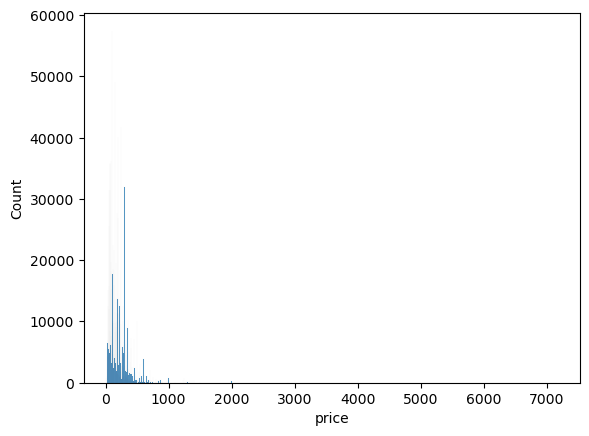

In [34]:
# A quick look on the distribution of the nigh price with histogram
sns.histplot(data=calendar, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

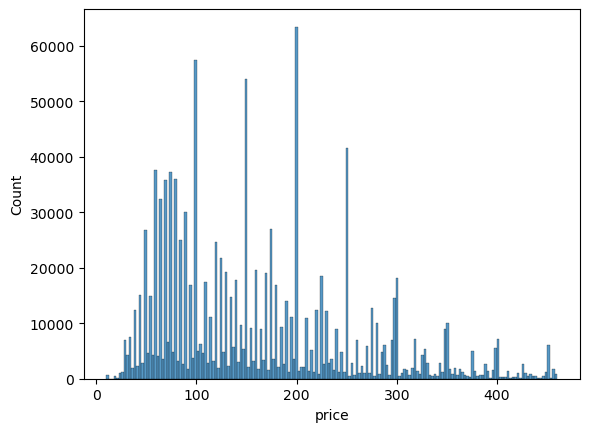

In [35]:
# Identify outliers using the interquartile range (IQR) method
q1 = calendar['price'].quantile(0.25)
q3 = calendar['price'].quantile(0.75)
iqr = q3 - q1
upper_threshold = q3 + 1.5 * iqr
lower_threshold = q1 - 1.5 * iqr

# Remove rows with price values outside of the IQR
calendar = calendar.loc[(calendar['price'] >= lower_threshold) & (calendar['price'] <= upper_threshold)]

# Create a new histogram of the price column with outliers removed
sns.histplot(data=calendar, x='price')

## Question 1 - How prices for all Boston’s Airbnb fluctuate throughout the Sep'16 - Sep'17? What are the peak times for Airbnb rate in Boston during the time?

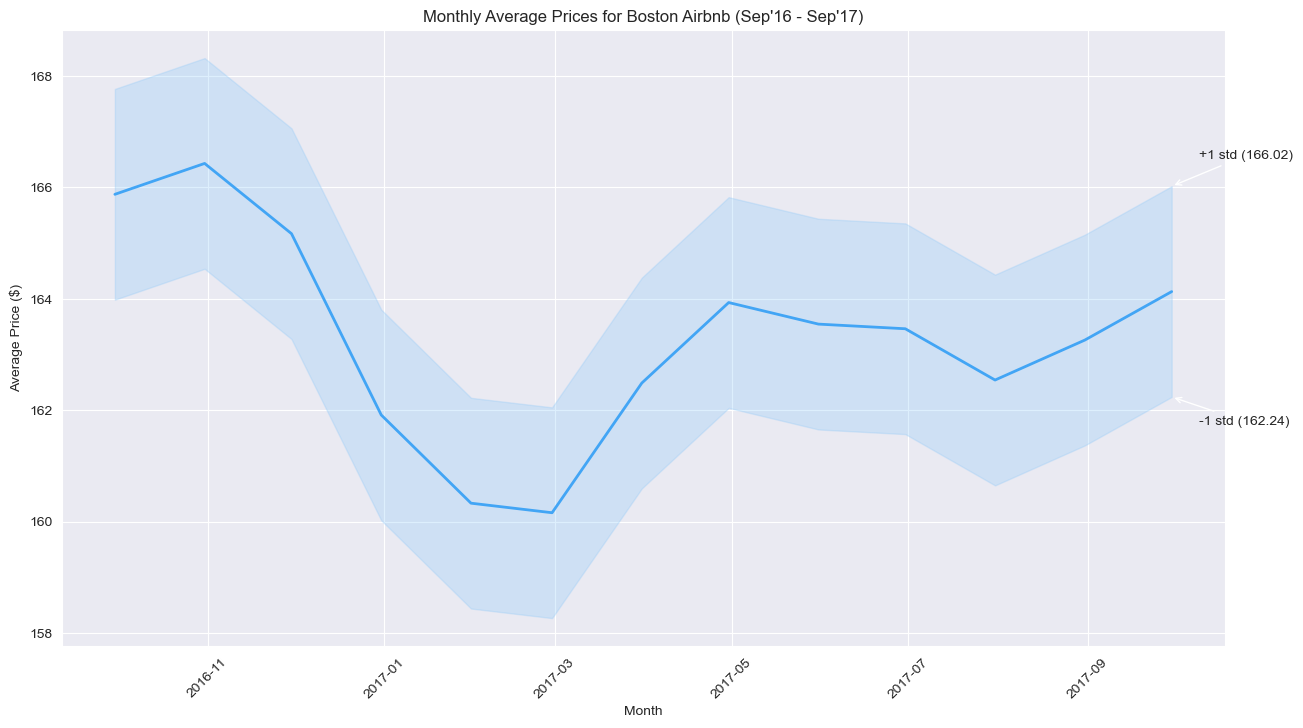

In [36]:
# Resample the data to get monthly averages
monthly_avg_price = calendar.set_index('date')['price'].resample('M').mean()

# Calculate the standard deviation of the monthly average prices
std = monthly_avg_price.std()

# Calculate the upper and lower price ranges based on one standard deviation
high_range = monthly_avg_price + std
low_range = monthly_avg_price - std

from matplotlib.dates import AutoDateLocator, AutoDateFormatter

# Plot the monthly average prices and shaded regions for the high and low ranges
sns.set_style('darkgrid')

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the monthly average prices and shaded regions for the high and low ranges
ax.plot(monthly_avg_price.index, monthly_avg_price, color='#42a5f5', linewidth=2)
ax.fill_between(monthly_avg_price.index, low_range, high_range, color='#90caf9', alpha=0.3)

# Set the x-axis tick locator and formatter to show all months
locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45)

# Add axis labels and a title
ax.set_xlabel('Month')
ax.set_ylabel('Average Price ($)')
ax.set_title('Monthly Average Prices for Boston Airbnb (Sep\'16 - Sep\'17)')

# Add text annotations for the upper and lower ranges
ax.annotate(f'+1 std ({high_range.iloc[-1]:.2f})', xy=(high_range.index[-1], high_range.iloc[-1]), xytext=(20, 20),
            textcoords='offset points', arrowprops=dict(facecolor='gray', arrowstyle='->'))
ax.annotate(f'-1 std ({low_range.iloc[-1]:.2f})', xy=(low_range.index[-1], low_range.iloc[-1]), xytext=(20, -20),
            textcoords='offset points', arrowprops=dict(facecolor='gray', arrowstyle='->'))

# Add a grid
ax.grid(True)

# Show the plot
plt.show()

## Question 2 - How neighborhoods in Boston can influence the listing price? In case we want to make a listing on Airbnb in Boston, can we predict our yearly income with neighborhoods?

In [37]:
# Merge calendar and listings
listings.rename(columns={'price': 'listing_price'}, inplace=True)
merged_df = pd.merge(calendar, listings[['id', 'neighbourhood_cleansed', 'listing_price']], left_on=['listing_id'], right_on=['id'])

# Create a new column with year and month
merged_df['year_month'] = merged_df['year'].astype(str) + '-' + merged_df['month'].astype(str).apply(lambda x: x.zfill(2))

# Group by neighbourhood_cleansed, month, and year, and calculate median, max, min, and mean price
grouped = merged_df.groupby(['neighbourhood_cleansed', 'year_month']).agg({'price': ['median', 'max', 'min', 'mean']}).reset_index()
grouped.columns = ['neighbourhood_cleansed', 'year_month', 'median_price', 'max_price', 'min_price', 'mean_price']

In [38]:
grouped.neighbourhood_cleansed.unique()

array(['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton',
       'Charlestown', 'Chinatown', 'Dorchester', 'Downtown',
       'East Boston', 'Fenway', 'Hyde Park', 'Jamaica Plain',
       'Leather District', 'Longwood Medical Area', 'Mattapan',
       'Mission Hill', 'North End', 'Roslindale', 'Roxbury',
       'South Boston', 'South Boston Waterfront', 'South End', 'West End',
       'West Roxbury'], dtype=object)

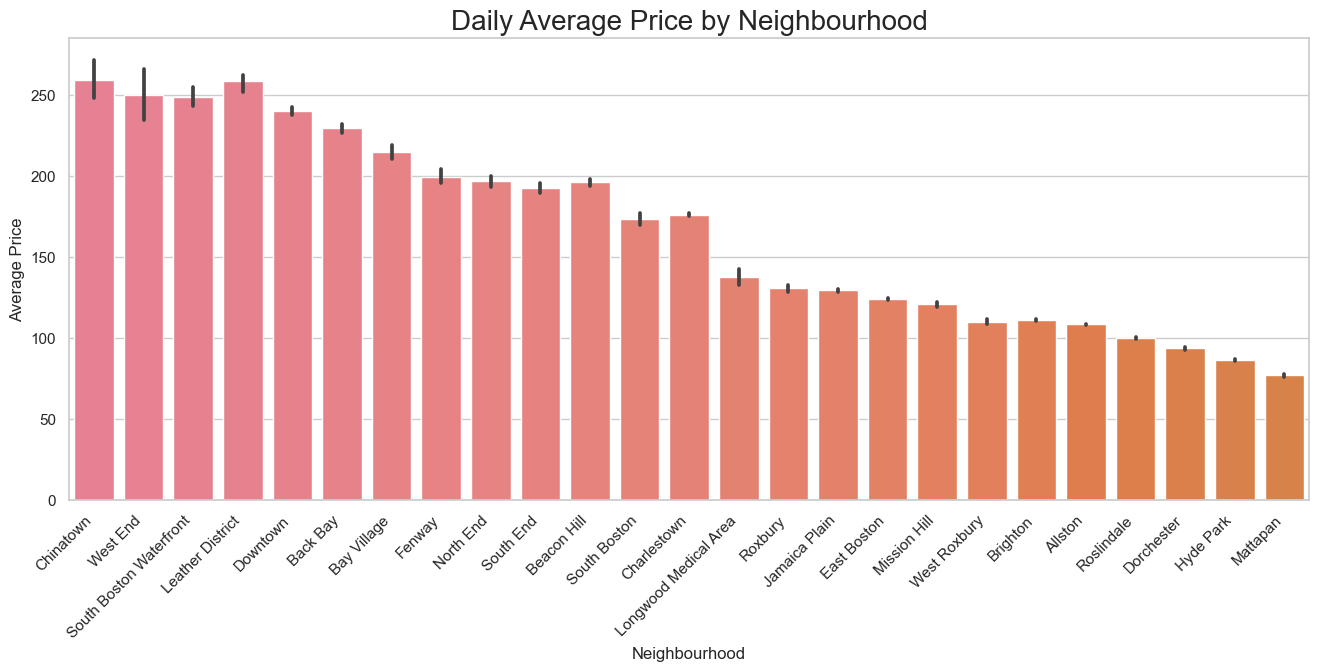

In [39]:
# Define a color palette based on the average price of each neighborhood
grouped_sorted = grouped.sort_values(by='mean_price', ascending=False)
palette = {neighborhood: sns.color_palette("husl", len(grouped_sorted), desat= 1)[i] for i, neighborhood in enumerate(grouped_sorted['neighbourhood_cleansed'].unique())}

# Create the barplot using the defined palette
sns.set(rc={'figure.figsize':(16,6)})
sns.set_style("whitegrid")
g = sns.barplot(x='neighbourhood_cleansed', y='mean_price', data=grouped_sorted, palette=palette)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(xlabel='Neighbourhood', ylabel='Average Price')
g.set_title('Daily Average Price by Neighbourhood', fontsize=20)

plt.show()


In [40]:
!pip install folium

In [41]:
import folium

# Calculate the year average price for each listing
year_avg_price = calendar.groupby('listing_id')['price'].mean().reset_index()
year_avg_price.columns = ['id', 'year_avg_price']

# Merge the year average price with the listings dataset
listings_merged = pd.merge(listings_useful, year_avg_price, on='id')

# Group the listings by neighborhood and calculate the mean year average price
grouped2 = listings_merged.groupby('neighbourhood_cleansed')['year_avg_price'].mean().reset_index()

# Create a map centered on Boston
map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

color_dict = {neighborhood: mcolors.to_hex(color) for neighborhood, color in palette.items()}

# Add a marker for each listing location, colored by neighborhood
for index, row in listings_merged.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=f"Price: ${row['price']:.2f}",
        color=color_dict[row['neighbourhood_cleansed']]
    ).add_to(map)

# Add a marker for each neighborhood with the name as tooltip
for index, row in grouped2.iterrows():
    neighborhood = row['neighbourhood_cleansed']
    year_avg_price = row['year_avg_price']
    folium.Marker(
        location=[listings_merged.loc[listings_merged['neighbourhood_cleansed'] == neighborhood, 'latitude'].iloc[0],
                  listings_merged.loc[listings_merged['neighbourhood_cleansed'] == neighborhood, 'longitude'].iloc[0]],
        popup=f"Neighborhood: {neighborhood}<br>Daily Average Price: ${year_avg_price:.2f}",
        icon=None
    ).add_to(map)

# Display the map
map

In [42]:
# Merge the listings and calendar datasets
merged_df = pd.merge(listings_useful[['id', 'neighbourhood_cleansed']], 
                     calendar[['listing_id', 'price', 'available']], 
                     left_on='id', right_on='listing_id')

# Convert the available column to boolean
merged_df['available'] = merged_df['available'].map(lambda x: True if x == 'f' else False)

# Filter to only include booked listings
booked_df = merged_df[merged_df['available'] == False]

# Calculate income and number of listings by neighbourhood
income_by_neighbourhood = booked_df.groupby('neighbourhood_cleansed').agg(total_price=('price', 'sum'),
                                                                           num_listings=('id', 'nunique'))

# Calculate the average income per listing by neighborhood
income_per_listing_by_neighbourhood = income_by_neighbourhood['total_price'] / income_by_neighbourhood['num_listings']

# Combine the previous DataFrame with the new one
neighbourhood_summary_df = pd.concat([income_by_neighbourhood, income_per_listing_by_neighbourhood], axis=1)

# Rename the columns
neighbourhood_summary_df.columns = ['total_price', 'num_listings', 'average_income_per_listing']

# Sort neighbourhoods by income
neighbourhood_summary_df = neighbourhood_summary_df.sort_values(by='total_price', ascending=False)

# Sort neighborhoods by income per listing in descending order
sorted_income = neighbourhood_summary_df.sort_values(by='average_income_per_listing', ascending=False)
sorted_income = sorted_income.reset_index()

sorted_income

neighbourhood_cleansed  total_price  num_listings  \
0          Leather District     225795.0             2   
1                  West End    2765466.0            41   
2               Bay Village     989511.0            17   
3                  Back Bay   12726520.0           249   
4                  Downtown    6968847.0           139   
5                 Chinatown    3290389.0            66   
6                 North End    4717385.0           105   
7   South Boston Waterfront    3014657.0            71   
8                    Fenway    9328567.0           223   
9              South Boston    5467635.0           138   
10                South End   10124871.0           258   
11              Beacon Hill    5434973.0           145   
12              Charlestown    3221804.0            94   
13                  Roxbury    3981011.0           124   
14            Jamaica Plain    8296695.0           271   
15             West Roxbury    1177746.0            40   
16              East Boston    3994599.0           137   
17             Mission Hill    2282752.0            81   
18                 Brighton    3700988.0           134   
19               Roslindale    1287744.0            50   
20    Longwood Medical Area     202758.0             8   
21               Dorchester    5571844.0           241   
22                 Mattapan     526421.0            23   
23                  Allston    3683065.0           170   
24                Hyde Park     393844.0            27   

    average_income_per_listing  
0                112897.500000  
1                 67450.390244  
2                 58206.529412  
3                 51110.522088  
4                 50135.589928  
5                 49854.378788  
6                 44927.476190  
7                 42459.957746  
8                 41832.139013  
9                 39620.543478  
10                39243.686047  
11                37482.572414  
12                34274.510638  
13                32104.927419  
14                30615.110701  
15                29443.650000  
16                29157.656934  
17                28182.123457  
18                27619.313433  
19                25754.880000  
20                25344.750000  
21                23119.684647  
22                22887.869565  
23                21665.088235  
24                14586.814815

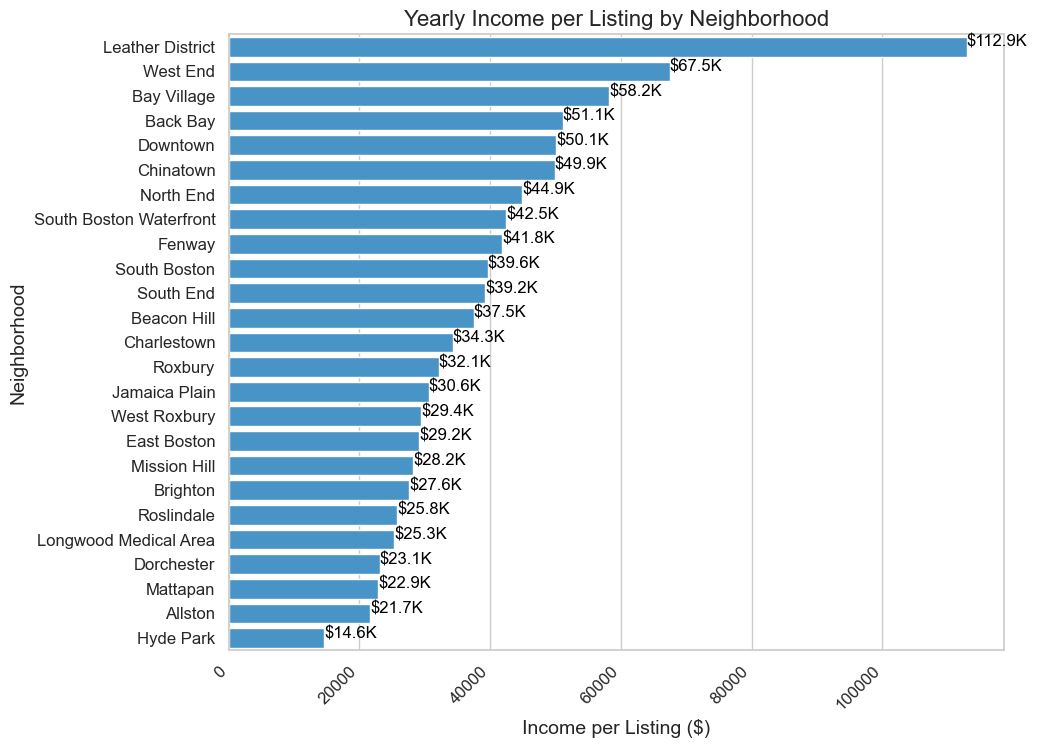

In [43]:
# Make a barchart to show the average income per listing by neighbourhood  
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
ax = sns.barplot(x='average_income_per_listing', y='neighbourhood_cleansed', data=sorted_income, color='#3498db')
plt.xlabel('Income per Listing ($)', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Yearly Income per Listing by Neighborhood', fontsize=16)

# Add values to bars
for i, v in enumerate(sorted_income['average_income_per_listing']):
    ax.text(v + 0.5, i, f'${v/1000:.1f}K', fontsize=12, color='black')

plt.show()

## Question 3 - How different features influence the listing price in Boston Airbnb?

In [44]:
# Create new columns for each unique value in room_type
room_type_cols = pd.get_dummies(listings_useful['room_type'])

# Rename columns for clarity
room_type_cols = room_type_cols.rename(columns={'Entire home/apt': 'Entire home/apartment', 
                                                'Private room': 'Private room', 
                                                'Shared room': 'Shared room'})

# Concatenate the new columns with the original dataframe
listings_feature = pd.concat([listings_useful, room_type_cols], axis=1)

# Drop the original room_type column
listings_feature = listings_feature.drop('room_type', axis=1)

# Preview the updated dataframe
listings_feature.head()

id  price neighbourhood_cleansed   latitude  longitude  \
0  12147973  250.0             Roslindale  42.282619 -71.133068   
1   3075044   65.0             Roslindale  42.286241 -71.134374   
2      6976   65.0             Roslindale  42.292438 -71.135765   
3   1436513   75.0             Roslindale  42.281106 -71.121021   
4   7651065   79.0             Roslindale  42.284512 -71.136258   

   number_of_reviews  review_scores_rating  availability_30  availability_60  \
0                  0                  94.0                0                0   
1                 36                  94.0               26               54   
2                 41                  98.0               19               46   
3                  1                 100.0                6               16   
4                 29                  99.0               13               34   

   availability_90  ...   host_id  property_type  accommodates bathrooms  \
0                0  ...  31303940          House             4       1.5   
1               84  ...   2572247      Apartment             2       1.0   
2               61  ...     16701      Apartment             2       1.0   
3               26  ...   6031442          House             4       1.0   
4               59  ...  15396970          House             2       1.5   

  bedrooms beds                                          amenities  \
0      2.0  3.0  {TV,"Wireless Internet",Kitchen,"Free Parking ...   
1      1.0  1.0  {TV,Internet,"Wireless Internet","Air Conditio...   
2      1.0  1.0  {TV,"Cable TV","Wireless Internet","Air Condit...   
3      1.0  2.0  {TV,Internet,"Wireless Internet","Air Conditio...   
4      1.0  2.0  {Internet,"Wireless Internet","Air Conditionin...   

   Entire home/apartment  Private room  Shared room  
0                      1             0            0  
1                      0             1            0  
2                      0             1            0  
3                      0             1            0  
4                      0             1            0  

[5 rows x 24 columns]

In [45]:
# Create a function to categorize the values
def categorize_accommodates(num):
    if num <= 4:
        return 'small'
    elif num <= 8:
        return 'medium'
    else:
        return 'large'

# Apply the function to create new columns
listings_feature['Accommodates small'] = listings_feature['accommodates'].apply(lambda x: 1 if categorize_accommodates(x) == 'small' else 0)
listings_feature['Accommodates medium'] = listings_feature['accommodates'].apply(lambda x: 1 if categorize_accommodates(x) == 'medium' else 0)
listings_feature['Accommodates large'] = listings_feature['accommodates'].apply(lambda x: 1 if categorize_accommodates(x) == 'large' else 0)

# Preview the updated dataframe
listings_feature.head()

id  price neighbourhood_cleansed   latitude  longitude  \
0  12147973  250.0             Roslindale  42.282619 -71.133068   
1   3075044   65.0             Roslindale  42.286241 -71.134374   
2      6976   65.0             Roslindale  42.292438 -71.135765   
3   1436513   75.0             Roslindale  42.281106 -71.121021   
4   7651065   79.0             Roslindale  42.284512 -71.136258   

   number_of_reviews  review_scores_rating  availability_30  availability_60  \
0                  0                  94.0                0                0   
1                 36                  94.0               26               54   
2                 41                  98.0               19               46   
3                  1                 100.0                6               16   
4                 29                  99.0               13               34   

   availability_90  ...  bathrooms  bedrooms  beds  \
0                0  ...        1.5       2.0   3.0   
1               84  ...        1.0       1.0   1.0   
2               61  ...        1.0       1.0   1.0   
3               26  ...        1.0       1.0   2.0   
4               59  ...        1.5       1.0   2.0   

                                           amenities Entire home/apartment  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ...                     1   
1  {TV,Internet,"Wireless Internet","Air Conditio...                     0   
2  {TV,"Cable TV","Wireless Internet","Air Condit...                     0   
3  {TV,Internet,"Wireless Internet","Air Conditio...                     0   
4  {Internet,"Wireless Internet","Air Conditionin...                     0   

  Private room  Shared room  Accommodates small  Accommodates medium  \
0            0            0                   1                    0   
1            1            0                   1                    0   
2            1            0                   1                    0   
3            1            0                   1                    0   
4            1            0                   1                    0   

   Accommodates large  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 27 columns]

In [46]:
# Breakdown bathrooms into feature columns by equally divided values into three

# Create new columns for bathroom_small, bathroom_mid, bathroom_large
bins = [-1, 1, 2, np.inf]
names = ['Bathroom less then 2', 'Bathroom less then 4', 'Bathroom more than 4']
listings_feature['bathroom_size'] = pd.cut(listings_feature['bathrooms'], bins, labels=names)
listings_feature = pd.get_dummies(listings_feature, columns=['bathroom_size'], prefix='', prefix_sep='')

# Preview the updated dataframe
listings_feature.head()

id  price neighbourhood_cleansed   latitude  longitude  \
0  12147973  250.0             Roslindale  42.282619 -71.133068   
1   3075044   65.0             Roslindale  42.286241 -71.134374   
2      6976   65.0             Roslindale  42.292438 -71.135765   
3   1436513   75.0             Roslindale  42.281106 -71.121021   
4   7651065   79.0             Roslindale  42.284512 -71.136258   

   number_of_reviews  review_scores_rating  availability_30  availability_60  \
0                  0                  94.0                0                0   
1                 36                  94.0               26               54   
2                 41                  98.0               19               46   
3                  1                 100.0                6               16   
4                 29                  99.0               13               34   

   availability_90  ...                                          amenities  \
0                0  ...  {TV,"Wireless Internet",Kitchen,"Free Parking ...   
1               84  ...  {TV,Internet,"Wireless Internet","Air Conditio...   
2               61  ...  {TV,"Cable TV","Wireless Internet","Air Condit...   
3               26  ...  {TV,Internet,"Wireless Internet","Air Conditio...   
4               59  ...  {Internet,"Wireless Internet","Air Conditionin...   

   Entire home/apartment  Private room Shared room Accommodates small  \
0                      1             0           0                  1   
1                      0             1           0                  1   
2                      0             1           0                  1   
3                      0             1           0                  1   
4                      0             1           0                  1   

  Accommodates medium  Accommodates large  Bathroom less then 2  \
0                   0                   0                     0   
1                   0                   0                     1   
2                   0                   0                     1   
3                   0                   0                     1   
4                   0                   0                     0   

   Bathroom less then 4  Bathroom more than 4  
0                     1                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     1                     0  

[5 rows x 30 columns]

In [47]:
# Create dummy variables for bedrooms
bedrooms_dummies = pd.get_dummies(pd.cut(listings_useful['bedrooms'], bins=3, labels=['Bedroom 0-1', 'Bedroom 2-3', 'Bedroom 4-5']), prefix='', prefix_sep='')

# Concatenate the dummies to the original dataframe
listings_feature = pd.concat([listings_feature, bedrooms_dummies], axis=1)

# Preview the updated dataframe
listings_feature.head()

id  price neighbourhood_cleansed   latitude  longitude  \
0  12147973  250.0             Roslindale  42.282619 -71.133068   
1   3075044   65.0             Roslindale  42.286241 -71.134374   
2      6976   65.0             Roslindale  42.292438 -71.135765   
3   1436513   75.0             Roslindale  42.281106 -71.121021   
4   7651065   79.0             Roslindale  42.284512 -71.136258   

   number_of_reviews  review_scores_rating  availability_30  availability_60  \
0                  0                  94.0                0                0   
1                 36                  94.0               26               54   
2                 41                  98.0               19               46   
3                  1                 100.0                6               16   
4                 29                  99.0               13               34   

   availability_90  ...  Shared room  Accommodates small  Accommodates medium  \
0                0  ...            0                   1                    0   
1               84  ...            0                   1                    0   
2               61  ...            0                   1                    0   
3               26  ...            0                   1                    0   
4               59  ...            0                   1                    0   

  Accommodates large Bathroom less then 2 Bathroom less then 4  \
0                  0                    0                    1   
1                  0                    1                    0   
2                  0                    1                    0   
3                  0                    1                    0   
4                  0                    0                    1   

   Bathroom more than 4  Bedroom 0-1  Bedroom 2-3  Bedroom 4-5  
0                     0            0            1            0  
1                     0            1            0            0  
2                     0            1            0            0  
3                     0            1            0            0  
4                     0            1            0            0  

[5 rows x 33 columns]

In [48]:
# Create a new column 'beds_small' with 1 if the number of beds is between 0 and 2, and 0 otherwise
listings_feature['Beds less than 3'] = np.where(listings_feature['beds'] <= 2, 1, 0)

# Create a new column 'beds_big' with 1 if the number of beds is more than 2, and 0 otherwise
listings_feature['Beds more than 3'] = np.where(listings_feature['beds'] > 2, 1, 0)

# Preview the updated dataframe
listings_feature.head()

id  price neighbourhood_cleansed   latitude  longitude  \
0  12147973  250.0             Roslindale  42.282619 -71.133068   
1   3075044   65.0             Roslindale  42.286241 -71.134374   
2      6976   65.0             Roslindale  42.292438 -71.135765   
3   1436513   75.0             Roslindale  42.281106 -71.121021   
4   7651065   79.0             Roslindale  42.284512 -71.136258   

   number_of_reviews  review_scores_rating  availability_30  availability_60  \
0                  0                  94.0                0                0   
1                 36                  94.0               26               54   
2                 41                  98.0               19               46   
3                  1                 100.0                6               16   
4                 29                  99.0               13               34   

   availability_90  ...  Accommodates medium  Accommodates large  \
0                0  ...                    0                   0   
1               84  ...                    0                   0   
2               61  ...                    0                   0   
3               26  ...                    0                   0   
4               59  ...                    0                   0   

   Bathroom less then 2 Bathroom less then 4 Bathroom more than 4 Bedroom 0-1  \
0                     0                    1                    0           0   
1                     1                    0                    0           1   
2                     1                    0                    0           1   
3                     1                    0                    0           1   
4                     0                    1                    0           1   

   Bedroom 2-3  Bedroom 4-5  Beds less than 3  Beds more than 3  
0            1            0                 0                 1  
1            0            0                 1                 0  
2            0            0                 1                 0  
3            0            0                 1                 0  
4            0            0                 1                 0  

[5 rows x 35 columns]

In [49]:
# Create a set of unique amenities
unique_amenities = set()

# Iterate over each amenity string and add to set
for amenities in listings_feature['amenities']:
    amenities_list = amenities.strip('{}').split(',')
    for amenity in amenities_list:
        unique_amenities.add(amenity.strip('"'))

print(unique_amenities)

{'', 'Kitchen', 'translation missing: en.hosting_amenity_50', 'Hangers', 'Cat(s)', 'Smoking Allowed', 'Essentials', 'Fire Extinguisher', 'Smoke Detector', 'Cable TV', 'Buzzer/Wireless Intercom', 'Suitable for Events', 'Washer / Dryer', 'Internet', 'Pets live on this property', 'Dog(s)', 'Wheelchair Accessible', 'Hair Dryer', 'Free Parking on Street', 'Lock on Bedroom Door', 'Washer', 'Air Conditioning', 'First Aid Kit', 'Carbon Monoxide Detector', 'Gym', 'Hot Tub', 'Pool', 'Doorman', 'Paid Parking Off Premises', 'Breakfast', 'Pets Allowed', 'Shampoo', 'Family/Kid Friendly', 'Dryer', 'Elevator in Building', 'Wireless Internet', 'translation missing: en.hosting_amenity_49', 'TV', 'Other pet(s)', 'Iron', 'Safety Card', 'Laptop Friendly Workspace', 'Indoor Fireplace', 'Free Parking on Premises', 'Heating', '24-Hour Check-in'}


In [50]:
# Convert the set to a list and sort alphabetically
unique_amenities = sorted(list(unique_amenities))

# Create a new DataFrame with the separate amenity columns
amenity_columns = pd.DataFrame()
for amenity in unique_amenities:
    amenity_columns[amenity] = listings_feature['amenities'].str.contains(amenity).astype(int)

# Concatenate the new amenity columns with the original DataFrame
listings_feature = pd.concat([listings_feature, amenity_columns], axis=1)

# Some features are actually not needed, drop them
amenities_to_drop = ['', 'translation missing: en.hosting_amenity_49','Pets live on this property', 'translation missing: en.hosting_amenity_50', 'Other pet(s)', 'Dog(s)', 'Cat(s)', 'Essentials']
listings_feature = listings_feature.drop(columns=amenities_to_drop)

# Preview the updated dataframe
listings_feature.head()

/var/folders/z2/d7szncxs4hjf_k8p0g_s347c0000gn/T/ipykernel_24611/2348232107.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  amenity_columns[amenity] = listings_feature['amenities'].str.contains(amenity).astype(int)
/var/folders/z2/d7szncxs4hjf_k8p0g_s347c0000gn/T/ipykernel_24611/2348232107.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  amenity_columns[amenity] = listings_feature['amenities'].str.contains(amenity).astype(int)
/var/folders/z2/d7szncxs4hjf_k8p0g_s347c0000gn/T/ipykernel_24611/2348232107.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  amenity_columns[amenity] = listings_feature['amenities'].str.contains(amenity).astype(int)


id  price neighbourhood_cleansed   latitude  longitude  \
0  12147973  250.0             Roslindale  42.282619 -71.133068   
1   3075044   65.0             Roslindale  42.286241 -71.134374   
2      6976   65.0             Roslindale  42.292438 -71.135765   
3   1436513   75.0             Roslindale  42.281106 -71.121021   
4   7651065   79.0             Roslindale  42.284512 -71.136258   

   number_of_reviews  review_scores_rating  availability_30  availability_60  \
0                  0                  94.0                0                0   
1                 36                  94.0               26               54   
2                 41                  98.0               19               46   
3                  1                 100.0                6               16   
4                 29                  99.0               13               34   

   availability_90  ...  Safety Card  Shampoo  Smoke Detector Smoking Allowed  \
0                0  ...            0        1               1               0   
1               84  ...            0        1               1               0   
2               61  ...            1        1               1               0   
3               26  ...            1        1               1               0   
4               59  ...            0        1               1               0   

  Suitable for Events TV  Washer  Washer / Dryer  Wheelchair Accessible  \
0                   0  1       1               0                      0   
1                   0  1       1               0                      0   
2                   0  1       1               0                      0   
3                   0  1       1               0                      0   
4                   0  0       0               0                      0   

   Wireless Internet  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 73 columns]

In [51]:
# Let's have a look on what we have now
list(listings_feature.columns)

['id',
 'price',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'minimum_nights',
 'maximum_nights',
 'host_since',
 'host_id',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'Entire home/apartment',
 'Private room',
 'Shared room',
 'Accommodates small',
 'Accommodates medium',
 'Accommodates large',
 'Bathroom less then 2',
 'Bathroom less then 4',
 'Bathroom more than 4',
 'Bedroom 0-1',
 'Bedroom 2-3',
 'Bedroom 4-5',
 'Beds less than 3',
 'Beds more than 3',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'In

In [52]:
# Drop the unnecessary columns
listings_feature = listings_feature.drop(listings_feature.columns[1:21], axis=1)

In [53]:
listings_feature.sample(20)

id  Entire home/apartment  Private room  Shared room  \
2259  12154150                      0             1            0   
12     2684840                      1             0            0   
3269   7933149                      0             1            0   
739    2658094                      1             0            0   
1336   4044840                      1             0            0   
1837   9386847                      1             0            0   
3155   1340649                      0             1            0   
1777   7321217                      1             0            0   
2203   8152796                      0             1            0   
2442   8325366                      1             0            0   
777   14300751                      0             0            1   
3130  11986653                      0             1            0   
1942   7874552                      0             1            0   
284     728238                      0             1            0   
435    6387077                      1             0            0   
3173  14693220                      1             0            0   
1100   7920541                      1             0            0   
2735  13275334                      0             1            0   
2139     38579                      1             0            0   
801    3602379                      1             0            0   

      Accommodates small  Accommodates medium  Accommodates large  \
2259                   1                    0                   0   
12                     1                    0                   0   
3269                   1                    0                   0   
739                    0                    1                   0   
1336                   1                    0                   0   
1837                   0                    1                   0   
3155                   1                    0                   0   
1777                   1                    0                   0   
2203                   1                    0                   0   
2442                   0                    1                   0   
777                    1                    0                   0   
3130                   1                    0                   0   
1942                   1                    0                   0   
284                    1                    0                   0   
435                    1                    0                   0   
3173                   1                    0                   0   
1100                   1                    0                   0   
2735                   1                    0                   0   
2139                   1                    0                   0   
801                    1                    0                   0   

      Bathroom less then 2  Bathroom less then 4  Bathroom more than 4  ...  \
2259                     1                     0                     0  ...   
12                       1                     0                     0  ...   
3269                     0                     0                     1  ...   
739                      1                     0                     0  ...   
1336                     1                     0                     0  ...   
1837                     1                     0                     0  ...   
3155                     1                     0                     0  ...   
1777                     1                     0                     0  ...   
2203                     1                     0                     0  ...   
2442                     0                     1                     0  ...   
777                      1                     0                     0  ...   
3130                     1                     0                     0  ...   
1942                     1                     0                     0  ...   
284                      1 

The preparation is good now. Let's find out the importance of each feature to night price.

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# merge data on listing id
merged = pd.merge(listings_feature, calendar, left_on='id', right_on='listing_id', how='inner')

# select features and target variable
X = merged.drop(['id', 'listing_id', 'date', 'available', 'price', 'year', 'month'], axis=1)
y = merged['price']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit random forest regression model to training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict on test set
y_pred = rf.predict(X_test)

# evaluate model performance on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Random Forest Regression RMSE:', rmse)

# get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# print feature importances
print('\nFeature Importances:')
print(feature_importances)

Random Forest Regression RMSE: 28.303150275468067

Feature Importances:
Entire home/apartment        0.449262
Bathroom less then 2         0.081185
Gym                          0.023689
Bedroom 0-1                  0.023082
Air Conditioning             0.022530
Cable TV                     0.019629
Washer                       0.018908
Elevator in Building         0.016865
Indoor Fireplace             0.015977
Fire Extinguisher            0.015750
Family/Kid Friendly          0.015688
Buzzer/Wireless Intercom     0.015408
TV                           0.014923
Free Parking on Premises     0.014901
Shampoo                      0.014056
Carbon Monoxide Detector     0.013341
First Aid Kit                0.013268
Breakfast                    0.013264
24-Hour Check-in             0.012710
Hair Dryer                   0.012573
Smoke Detector               0.012536
Pets Allowed                 0.011989
Laptop Friendly Workspace    0.010932
Accommodates small           0.010191
Safety Card     

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Drop rows with missing values
merged.dropna(inplace=True)

# Define the target variable and features
# select features and target variable
X = merged.drop(['id', 'listing_id', 'date', 'available', 'price', 'year', 'month'], axis=1)
y = merged['price']

# Fit a random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importances and sort them in descending order
importances = list(zip(X.columns, rf.feature_importances_))
importances.sort(key=lambda x: x[1], reverse=True)

# Loop through all the features and calculate the predicted price increase or decrease
for feature, importance in importances:
    change = importance * y.mean()
    if change > 0:
        print(f"{feature}: +${change:.2f} per night")
    else:
        print(f"{feature}: -${abs(change):.2f} per night")

Entire home/apartment: +$73.27 per night
Bathroom less then 2: +$13.18 per night
Gym: +$3.94 per night
Bedroom 0-1: +$3.81 per night
Air Conditioning: +$3.73 per night
Cable TV: +$3.22 per night
Washer: +$3.11 per night
Elevator in Building: +$2.80 per night
Indoor Fireplace: +$2.59 per night
Fire Extinguisher: +$2.57 per night
Buzzer/Wireless Intercom: +$2.51 per night
Family/Kid Friendly: +$2.51 per night
Free Parking on Premises: +$2.41 per night
Shampoo: +$2.37 per night
TV: +$2.37 per night
Breakfast: +$2.19 per night
Smoke Detector: +$2.15 per night
24-Hour Check-in: +$2.11 per night
First Aid Kit: +$2.11 per night
Carbon Monoxide Detector: +$2.08 per night
Hair Dryer: +$2.02 per night
Pets Allowed: +$1.91 per night
Laptop Friendly Workspace: +$1.77 per night
Hangers: +$1.64 per night
Accommodates small: +$1.64 per night
Lock on Bedroom Door: +$1.63 per night
Safety Card: +$1.60 per night
Iron: +$1.56 per night
Kitchen: +$1.34 per night
Doorman: +$1.21 per night
Suitable for Even

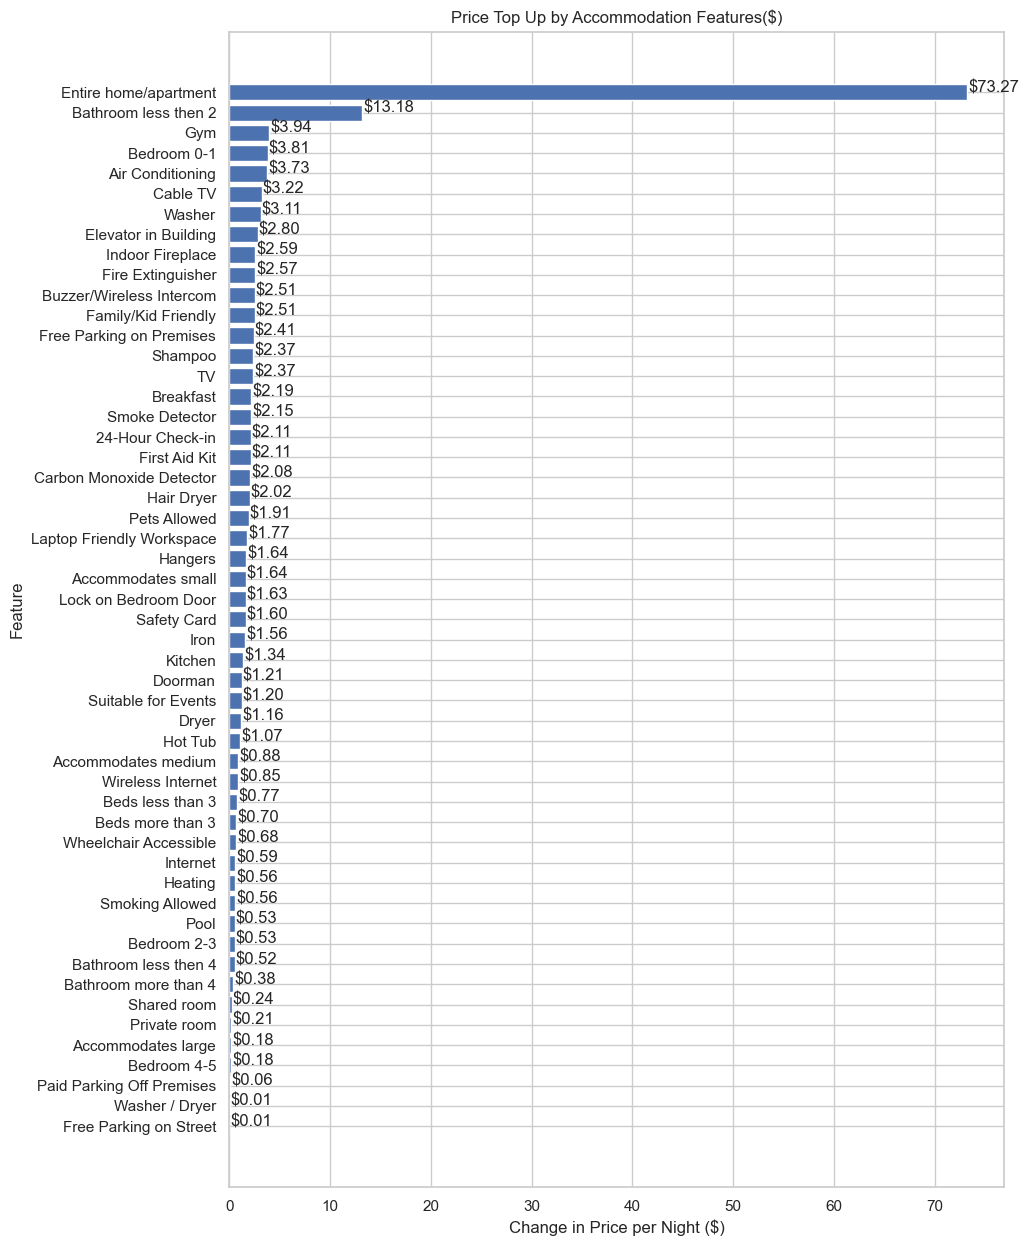

In [61]:
# Create a list of feature names and their corresponding changes in price
features = [x[0] for x in importances]
changes = [x[1]*y.mean() for x in importances]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(features, changes)

# Add labels and title
ax.set_xlabel('Change in Price per Night ($)')
ax.set_ylabel('Feature')
ax.set_title('Price Top Up by Accommodation Features($)')

# Invert the y-axis so that the most important feature is at the top
ax.invert_yaxis()

# Add value on each bar
for i in range(len(features)):
    ax.text(changes[i] + 0.1, i, f'${changes[i]:.2f}')

# Display the chart
plt.show()

The features are ranked in descending order according to their impact on the price, with the most influential feature listed first and the least influential feature listed last.

At the top of the list, we see that "entire_home_apt" has the greatest impact on price, increasing it by an estimated $73.27 per night. This suggests that listings for entire homes or apartments are generally priced higher than other types of accommodations.

Other features that have a significant impact on price include the number of bathrooms and bedrooms, as well as amenities such as air conditioning, cable TV, and a washer. Listings that include these features are expected to be priced higher than those that don't.

Further down the list, we see that amenities such as a pool, shared room, and private room have a relatively small impact on price, with estimated increases of less than $1 per night. This suggests that these features may be less important to guests when choosing a listing, or that they are less commonly included in listings overall.